# **Google Data Analytics Professional Certificate**
Date: **13th October 2022**\
Author: **Anggi Firdian Saputra**\
Case Study: **2**

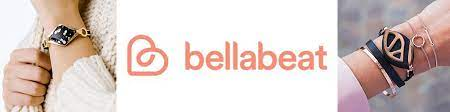

# Case Study 2: How Can a Wellness Technology Company Play It Smart?

## 1. ASK

### Background
Bellabeat is a wellness subsidiary Company of Five River Groups Inc headquartered in San Francisco that develops wearable computers for women. The company has offices in Zagreb, San Francisco and London. It was founded in 2013 by Sandro Mur, Lovepreet Singh and Urška Sršen.

Inspiring and empowering women with knowledge about their own health and habits, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for females.

The co-founder and Chief Creative Officer, Urška Sršen is confident that an analysis of non-Bellebeat consumer data (ie. FitBit fitness tracker usage data) would reveal more opportunities for growth.

### Business Task
Analyze FitBit Fitness Tracker Data to gain insights into how consumers are using the FitBit app and discover trends and insights for Bellabeat marketing strategy.

### Key Stakeholders
1. Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
2. Sando Mur: Mathematician, Bellabeat’s cofounder and key member of the Bellabeat executive team
3. Bellabeat marketing analytics team: A team of data analysts guiding Bellabeat's marketing strategy.

### Business Objectives
1. What are some trends in smart device usage?
2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

### Deliverables
1. A clear summary of the business task
2. A description of all data sources used
3. Documentation of any cleaning or manipulation of data
4. A summary of your analysis
5. Supporting visualizations and key findings
6. Your top high-level content recommendations based on your analysis

## Prepare

### Deliverable
FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Mobius): 
1. This Kaggle data set ontains personal fitness tracker from thirty fitbit users. 
2. Thirty eligible Fitbit users consented to the submission of personal tracker data, including minute-level output for physical activity, heart rate, and sleep monitoring. 
3. It includes information about daily activity, steps, and heart rate that can be used to explore users’ habits.

### Limitations of Data Set
1. Data collected from year 2016. Users' daily activity, fitness and sleeping habits, diet and food consumption may have changed since then, hence data may not be timely or relevant.
2. Sample size of 30 female FitBit users is not representative of the entire female population.
3. As data is collected in a survey, hence unable to ascertain the integrity or accuracy of data.

### Is Data ROCCC?
A good data source is **ROCCC** which stands for **R**eliable, **O**riginal, **C**omprehensive, **C**urrent, and **C**ited.
1. **R**eliable - LOW - Not reliable as it only has 30 respondents
2. **O**riginal - LOW - Third party provider (Amazon Mechanical Turk)
3. **C**omprehensive - MED - Parameters match most of Bellabeat's products' parameters
4. **C**urrent - LOW - Data is 6 years old and is not relevant
5. **C**ited - LOW - Data collected from third party, hence unknown

Overall, the dataset is considered bad quality data and **it is not recommended to produce business recommendations based on this data.**

### Data Selection For Use
The following file is selected and copied for analysis.

- **dailyActivity_merged.csv**

## Process

In [38]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [4]:
#Import dataset
daily_activity = pd.read_csv('dailyActivity_merged.csv')

In [5]:
# Cleaning and Manipulation Dataset
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [7]:
daily_activity.isnull().sum()

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64

There is no missing data in the dataset. Then, we can going to the next section

In [8]:
# Ensure the data type is correct
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

The data type of ActivityDate is incorrect, then it is must be change become a datetime64 type

In [12]:
# Ensure the number of ID is 30
uniq_id = len(pd.unique(daily_activity['Id']))
uniq_id

33

In [17]:
# Convert data type of ActivityDate Column
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], infer_datetime_format=True)
daily_activity['ActivityDate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 940 entries, 0 to 939
Series name: ActivityDate
Non-Null Count  Dtype         
--------------  -----         
940 non-null    datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 7.5 KB


In [18]:
# Check Format from the Date Type
daily_activity['ActivityDate']

0     2016-04-12
1     2016-04-13
2     2016-04-14
3     2016-04-15
4     2016-04-16
         ...    
935   2016-05-08
936   2016-05-09
937   2016-05-10
938   2016-05-11
939   2016-05-12
Name: ActivityDate, Length: 940, dtype: datetime64[ns]

In [20]:
daily_activity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [25]:
# Insert New Columns for further analysis soon
new_cols = ['Id', 'ActivityDate', 'DayoftheWeek', 'TotalSteps', 'TotalDistance', 'TrackerDistance', 'LoggedActivitiesDistance', 'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance', 'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes', 'SedentaryMinutes', 'TotalExerciseMinutes', 'TotalExerciseHours', 'Calories']
df_activity = daily_activity.reindex(columns = new_cols) #Reindex to put the new list of columns
df_activity.head()

,Id,ActivityDate,DayoftheWeek,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,TotalExerciseMinutes,TotalExerciseHours,Calories
0,1503960366,2016-04-12,NaN,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,NaN,NaN,1985
1,1503960366,2016-04-13,NaN,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,NaN,NaN,1797
2,1503960366,2016-04-14,NaN,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,NaN,NaN,1776
3,1503960366,2016-04-15,NaN,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,NaN,NaN,1745
4,1503960366,2016-04-16,NaN,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,NaN,NaN,1863


In [26]:
# Insert a list of the day in the DayoftheWeek
df_activity['DayoftheWeek'] = df_activity['ActivityDate'].dt.day_name()
df_activity['DayoftheWeek'].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Friday
4     Saturday
Name: DayoftheWeek, dtype: object

In [42]:
# Rename column name
df_activity.rename(columns = {"Id":"id", "ActivityDate":"date", "DayoftheWeek":"day_of_the_week", "TotalSteps":"total_steps", "TotalDistance":"total_dist", "TrackerDistance":"track_dist", "LoggedActivitiesDistance":"logged_dist", "VeryActiveDistance":"very_active_dist", "ModeratelyActiveDistance":"moderate_active_dist", "LightActiveDistance":"light_active_dist", "SedentaryActiveDistance":"sedentary_active_dist", "VeryActiveMinutes":"very_active_mins", "FairlyActiveMinutes":"fairly_active_mins", "LightlyActiveMinutes":"lightly_active_mins", "SedentaryMinutes":"sedentary_mins", "TotalExerciseMinutes":"total_mins","TotalExerciseHours":"total_hours","Calories":"calories"}, inplace = True)
df_activity.head()

,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
0,1503960366,2016-04-12,Tuesday,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1094,18.0,1985
1,1503960366,2016-04-13,Wednesday,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1033,17.0,1797
2,1503960366,2016-04-14,Thursday,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1440,24.0,1776
3,1503960366,2016-04-15,Friday,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,998,17.0,1745
4,1503960366,2016-04-16,Saturday,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1040,17.0,1863


In [43]:
# Insert the value of the total_mins colum
df_activity['total_mins'] = df_activity['very_active_mins'] + df_activity['fairly_active_mins'] + df_activity['lightly_active_mins'] + df_activity['sedentary_mins']
df_activity['total_mins'].head()

0    1094
1    1033
2    1440
3     998
4    1040
Name: total_mins, dtype: int64

In [44]:
# Insert the values of the total_hours column
df_activity['total_hours'] = round(df_activity['total_mins']/60)
df_activity['total_hours'].head()

0    18.0
1    17.0
2    24.0
3    17.0
4    17.0
Name: total_hours, dtype: float64

## Analyze

In [45]:
# Show the general statistical from the dataframe
df_activity.describe(include='all', datetime_is_numeric=True)

,id,date,day_of_the_week,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
count,9.400000e+02,940,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
unique,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Tuesday,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.855407e+09,2016-04-26 06:53:37.021276672,NaN,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,1218.753191,20.313830,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,NaN,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,989.750000,16.000000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,NaN,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,1440.000000,24.000000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,NaN,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,1440.000000,24.000000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,NaN,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,1440.000000,24.000000,4900.000000


- On average, users logged 7,637 steps or 5.4km which is not adequate. As recommended by CDC, an adult female has to aim at least 10,000 steps or 8km per day to benefit from general health, weight loss and fitness improvement. Source: https://www.medicalnewstoday.com/articles/how-many-steps-should-you-take-a-day

- Sedentary users are the majority logging on average 991 minutes or 20 hours making up 81% of total average minutes.

- Noting that average calories burned is 2,303 calories equivalent to 0.6 pound. Could not interpret into detail as calories burned depend on several factors such as the age, weight, daily tasks, exercise, hormones and daily calorie intake. Source: https://www.healthline.com/health/fitness-exercise/how-many-calories-do-i-burn-a-day#Burning-calories
- The day with the most activity is on Tuesday as many as 156 activities in three months
- Average product usage during 20 hours

In [46]:
df_activity.corr()

,id,total_steps,total_dist,track_dist,logged_dist,very_active_dist,moderate_active_dist,light_active_dist,sedentary_active_dist,very_active_mins,fairly_active_mins,lightly_active_mins,sedentary_mins,total_mins,total_hours,calories
id,1.000000,0.185721,0.241000,0.238816,0.188015,0.308691,0.026665,0.019629,-0.015698,0.303608,0.051158,-0.098754,-0.043319,-0.048274,-0.048140,0.396671
total_steps,0.185721,1.000000,0.985369,0.984822,0.181849,0.740115,0.507105,0.692208,0.070505,0.667079,0.498693,0.569600,-0.327484,-0.017285,-0.018152,0.591568
total_dist,0.241000,0.985369,1.000000,0.999505,0.188332,0.794582,0.470758,0.662002,0.082389,0.681297,0.462899,0.516300,-0.288094,0.004523,0.003513,0.644962
track_dist,0.238816,0.984822,0.999505,1.000000,0.162585,0.794338,0.470277,0.661365,0.074591,0.680816,0.463154,0.514713,-0.289343,0.002416,0.001377,0.645313
logged_dist,0.188015,0.181849,0.188332,0.162585,1.000000,0.150852,0.076527,0.138302,0.154996,0.234443,0.053860,0.102135,-0.046999,0.021689,0.020614,0.207595
very_active_dist,0.308691,0.740115,0.794582,0.794338,0.150852,1.000000,0.192986,0.157669,0.046117,0.826681,0.211730,0.059845,-0.061754,0.072625,0.070989,0.491959
moderate_active_dist,0.026665,0.507105,0.470758,0.470277,0.076527,0.192986,1.000000,0.237847,0.005793,0.225464,0.946934,0.162092,-0.221436,-0.085297,-0.085949,0.216790
light_active_dist,0.019629,0.692208,0.662002,0.661365,0.138302,0.157669,0.237847,1.000000,0.099503,0.154966,0.220129,0.885697,-0.413552,-0.069207,-0.068906,0.466917
sedentary_active_dist,-0.015698,0.070505,0.082389,0.074591,0.154996,0.046117,0.005793,0.099503,1.000000,0.008258,-0.022361,0.124185,0.035475,0.090510,0.090697,0.043652
very_active_mins,0.303608,0.667079,0.681297,0.680816,0.234443,0.826681,0.225464,0.154966,0.008258,1.000000,0.312420,0.051926,-0.164671,-0.018244,-0.021064,0.615838


Based on the results of the correlation table:
- Parameters that produce good calorie burning are total_steps, total_dist, track_dist, very_active_dist, light_active_dist, sedentary_active_dist, and very_active_mins
- Activities that greatly affect the results of burning calories are total_dist,track_dist, very_active_dist, very_active_mins. Where, the burning of calories will be better if you steps a considerable distance, there are activities during the steps or a lot of movement, and how long the activity is carried out.
- There is almost no calorie burning if do not do any activities.

## Share

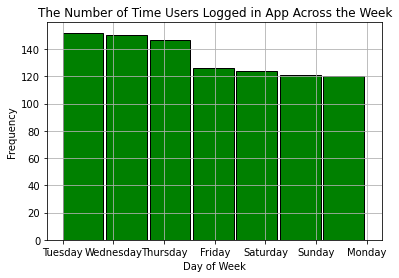

In [61]:
# Make histogram to show how often activity is done during one week
plt.hist(df_activity.day_of_the_week,
        bins = 7,
        width = 0.8,
        color = 'g',
        edgecolor = 'k')
plt.figsize = (8,6)
plt.xlabel('Day of Week')
plt.ylabel('Frequency')
plt.title('The Number of Time Users Logged in App Across the Week')
plt.grid(True)
plt.show()

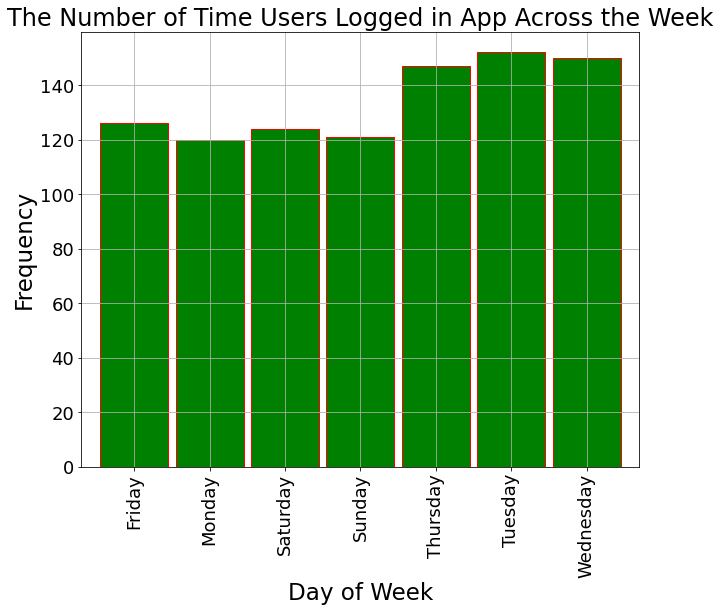

In [106]:
plot_df = (
    df_activity.groupby(df_activity['day_of_the_week'])
        .size())

# Make bar chart to show how often activity is done during one week
plt.figure(figsize = (10,8))
plot_df.plot(kind='bar', color = 'g', edgecolor = 'r', fontsize = 18, width = 0.9, grid = True)
plt.xlabel('Day of Week', fontsize = 23) 
plt.ylabel('Frequency', fontsize = 23)
plt.title('The Number of Time Users Logged in App Across the Week', fontsize = 24)
plt.show()

In this bar chart, we are looking at the frequency of FitBit app usage in terms of days of the week.

1. We discovered that users prefer or remember (giving them the doubt of benefit that they forgotten) to track their activity on the app during midweek from Tuesday to Friday.

2. Noting that the frequency dropped on Friday and continue on weekends and Monday.

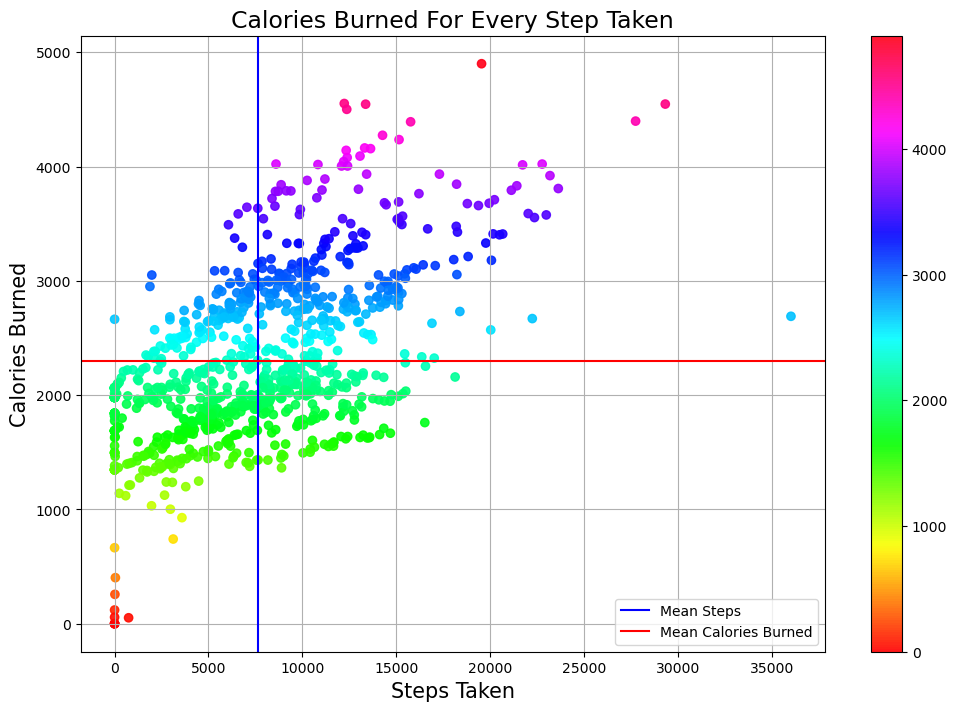

In [159]:
# Make scatter plot between steps taken vs. calories burned
plt.figure(figsize=(12,8)) # specify size of the chart
plt.scatter(df_activity.total_steps, df_activity.calories, 
            alpha = 0.9, c = df_activity.calories, 
            cmap = "hsv")

mean_calories = 2303
mean_steps = 7638

plt.colorbar(orientation = "vertical")
plt.axvline(mean_steps, color = "Blue", label = "Mean Steps")
plt.axhline(mean_calories, color = "Red", label = "Mean Calories Burned")
plt.xlabel("Steps Taken", fontsize = 15)
plt.ylabel("Calories Burned", fontsize = 15)
plt.title("Calories Burned For Every Step Taken", fontsize = 17)
plt.grid(True)
plt.legend(loc = 'lower right')
plt.show()

From the scatter plot, we discovered that:

1. It is a positive correlation.

2. We observed that intensity of calories burned increase when users are at the range of > 0 to 15000 steps with calories burn rate cooling down from 15000 steps onwards.

3. Noted a few outliers:

    - Zero steps with zero to minimal calories burned.
    - 1 observation of > 35000 steps with < 3000 calories burned.
    - Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data collection (ie. miscalculations, data contamination or human error).

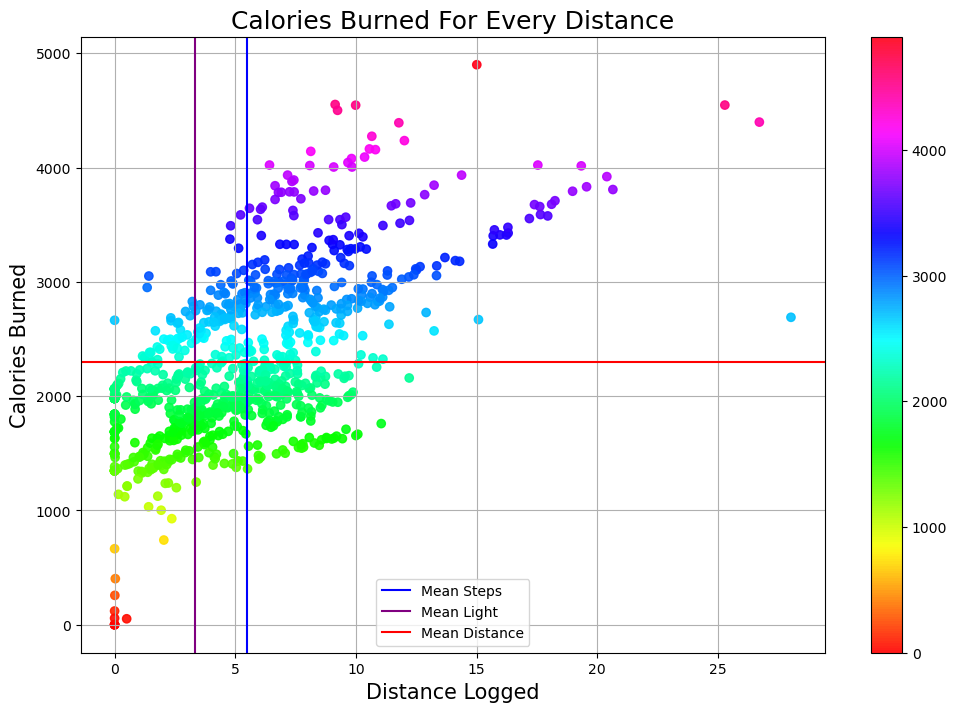

In [170]:
# Make scatter plot between hours logged vs. calories burned
plt.figure(figsize=(12,8)) # Specify size of the chart
plt.scatter(df_activity.total_dist, df_activity.calories, 
            alpha = 0.9, c = df_activity.calories, 
            cmap = "hsv")

# adding annotations and visuals
mean_calories = 2303
mean_dist = 5.48
mean_light = 3.34

plt.colorbar(orientation = "vertical")
plt.axvline(mean_dist, color = "Blue", label = "Mean Steps")
plt.axvline(mean_light, color = "Purple", label = "Mean Light")
plt.axhline(mean_calories, color = "Red", label = "Mean Distance")
plt.xlabel("Distance Logged", fontsize = 15)
plt.ylabel("Calories Burned", fontsize = 15)
plt.title("Calories Burned For Every Distance", fontsize = 18)
plt.legend(loc = 'lower center')
plt.grid(True)
plt.show()

From the scatter plot, we discovered that:

1. It is a positive correlation.

2. We observed that intensity of calories burned increase when users are at the range of > 0 to 10 km steps with calories burn rate cooling down from 10 km steps onwards.

3. Noted a few outliers:

    - 0 km steps with zero to minimal calories burned.
    - There are three observations of > 25 km steps with > 2500 calories burned.
    - Deduced that outliers could be due to natural variation of data, change in user's usage or errors in data collection (ie. miscalculations, data contamination or human err

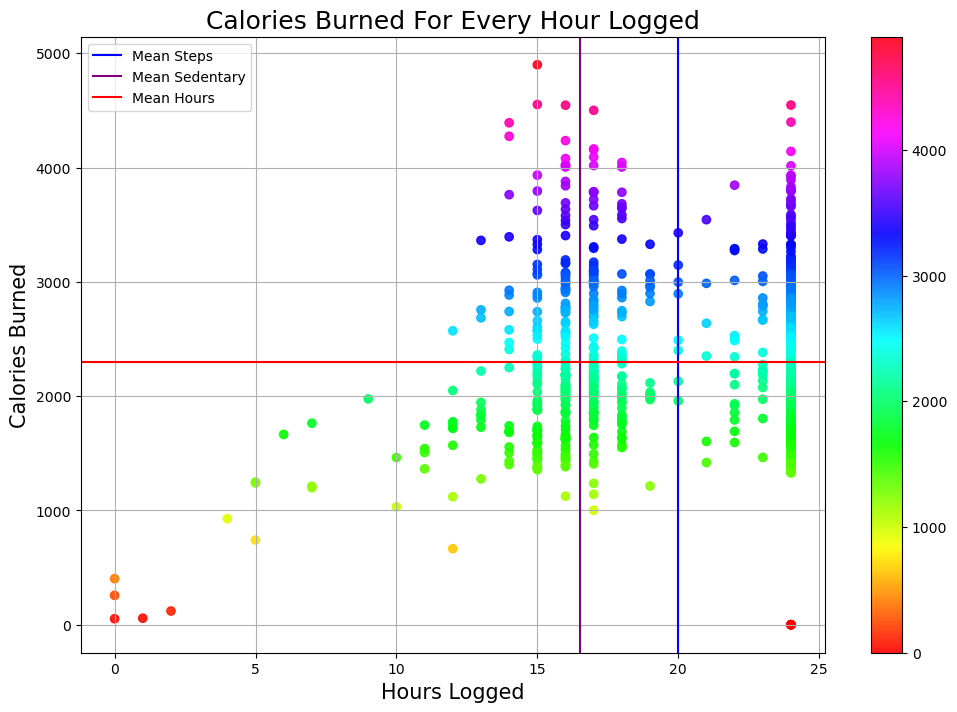

In [157]:
# Make scatter plot between hours logged vs. calories burned
plt.figure(figsize=(12,8)) # Specify size of the chart
plt.scatter(df_activity.total_hours, df_activity.calories, 
            alpha = 0.9, c = df_activity.calories, 
            cmap = "hsv")

# adding annotations and visuals
mean_calories = 2303
mean_hours = 20
mean_sedentary = 991 / 60

plt.colorbar(orientation = "vertical")
plt.axvline(mean_hours, color = "Blue", label = "Mean Steps")
plt.axvline(mean_sedentary, color = "Purple", label = "Mean Sedentary")
plt.axhline(mean_calories, color = "Red", label = "Mean Hours")
plt.xlabel("Hours Logged", fontsize = 15)
plt.ylabel("Calories Burned", fontsize = 15)
plt.title("Calories Burned For Every Hour Logged", fontsize = 18)
plt.legend(loc = 'upper left')
plt.grid(True)
plt.show()

The scatter plot is showing:

1. A weak positive correlation whereby the increase of hours logged does not translate to more calories being burned. That is largely due to the average sedentary hours (purple line) plotted at the 16 to 17 hours range.

2. Again, we can see a few outliers:

    - The same zero value outliers
    - An unusual red dot at the 24 hours with zero calorie burned which may be due to the same reasons as above.

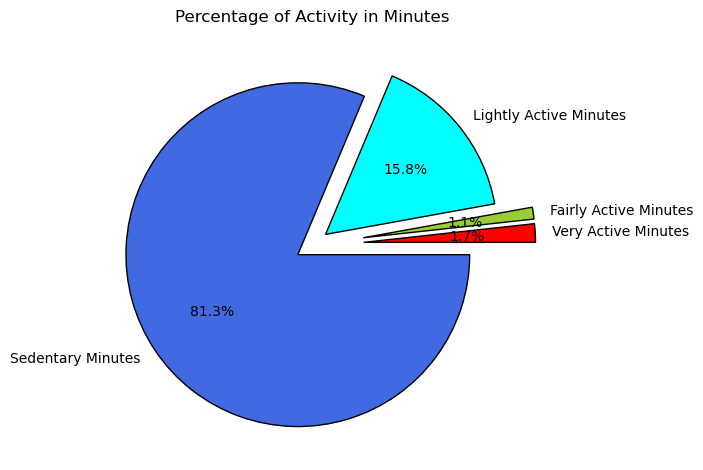

In [145]:
# Make pie chart to show percentage of activity in minutes
very_active_mins = df_activity["very_active_mins"].sum()
fairly_active_mins = df_activity["fairly_active_mins"].sum()
lightly_active_mins = df_activity["lightly_active_mins"].sum()
sedentary_mins = df_activity["sedentary_mins"].sum()

# plotting pie chart
slices = [very_active_mins, fairly_active_mins, lightly_active_mins, sedentary_mins]
labels = ["Very Active Minutes", "Fairly Active Minutes", "Lightly Active Minutes", "Sedentary Minutes"]
colours = ["r", "yellowgreen", "cyan", "royalblue"]
explode = [0.3, 0.3, 0.1, 0.1]
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

As seen from the pie chart,

1. Sedentary minutes takes the biggest slice at 81.3%.

2. This indicates that users are using the FitBit app to log daily activities such as daily commute, inactive movements (moving from one spot to another) or running errands.

3. App is rarely being used to track fitness (ie. running) as per the minor percentage of fairly active activity (1.1%) and very active activity (1.7%). This is highly discouraging as FitBit app was developed to encourage fitness.

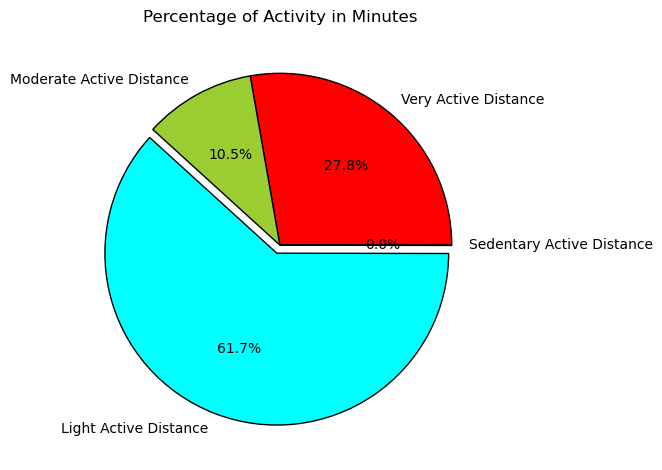

In [152]:
very_active_dist = df_activity["very_active_dist"].sum()
moderate_active_dist = df_activity["moderate_active_dist"].sum()
light_active_dist = df_activity["light_active_dist"].sum()
sedentary_active_dist = df_activity["sedentary_active_dist"].sum()

# plotting pie chart
slices = [very_active_dist, moderate_active_dist, light_active_dist, sedentary_active_dist]
labels = ["Very Active Distance", "Moderate Active Distance", "Light Active Distance", "Sedentary Active Distance"]
colours = ["r", "yellowgreen", "cyan", "royalblue"]
explode = [0, 0, 0.05, 0]
plt.pie(slices, labels = labels, 
        colors = colours, wedgeprops = {"edgecolor": "black"}, 
        explode = explode, autopct = "%1.1f%%")
plt.title("Percentage of Activity in Minutes")
plt.tight_layout()
plt.show()

## Act

### Trends Identified
1. Majority of users (81.3%) are using the FitBit app to track sedentary activities and not using it for tracking their health habits.

2. Majority of users (61.7%) are using the FitBit app to track distance of light activities and not using it for tracking distance of sedentary activities

3. Users prefer to track their activities during weekdays as compared to weekends - perhaps because they spend more time outside on weekdays and stay in on weekends.

4. There is a positive correlation between the distance traveled by the steps, the type of activity, and the duration of the activity. Where, the farther distance traveled, the heavier activity, and the longer exercise, so the more calories burned and good for health.

### Relationship Between Trends with Bellabeat Customers
Both companies develop products focused on providing women with their health, habit and fitness data and encouraging them to understand their current habits and make healthy decisions. These common trends surrounding health, light activity, and fitness can very well be applied to Bellabeat customers.

### Relationship Between Trends with Bellabeat Marketing Strategy
1. Bellabeat marketing team can encourage users by educating and equipping them with knowledge about fitness benefits, suggest different types of exercise (ie. simple 10 minutes exercise on weekday and a more intense exercise on weekends) and calories intake and burnt rate information on the Bellabeat app.

2. On weekends, Bellabeat app can also prompt notification to encourage users to exercise.

3. Bellabeat marketing team can also send notification about exercise schedule to reminder the users to carry out their routine activities.

4. Bellabeat marketing team can remind to increase exercise in order to get optimal results in burned calories and display the results of burned calories in the previous exercise.